# The Kronig-Penney Model
We'll be finding Hamiltonian eigenvalues and eigenfunctions of the model, or its' definite energy levels and wavefunctions.

In [ ]:
from models.kronig_penney import kronig_penney as kp
from constants import PLANCK_CONST_Js, J_eV_CONVERSION_JpeV, MASS_ELECTRON_kg
from matplotlib import pyplot as plt
import numpy as np

# V0: Potential well depth (eV)
depth_eV = 5.0 * 1.6920644164445534e2
depth_J = depth_eV * J_eV_CONVERSION_JpeV

# a, b: Crystal lattice distances (m)
len_a_m = 1e-10
len_b_m = 1e-10

# N: Number of periods in crystal before cycling back to other side
num_periods = 1e23

# n: Propagation constant, which determines phase of wavefunction
propagation_const = 3

<img src="../../documents/kronig_penney/figs/potential_E_neg.png" />

In [6]:
eigenvalue_eq_n, roots_n = kp.compute_eigenvalue_negative(
    well_depth=depth_J, len_a_m=len_a_m, len_b_m=len_b_m, start=-0.9999999*depth_J, stop=-0.0000001*depth_J,
    num=1000000, propagation_const=propagation_const, num_periods=num_periods)
eigenvals_n = roots_n[0]

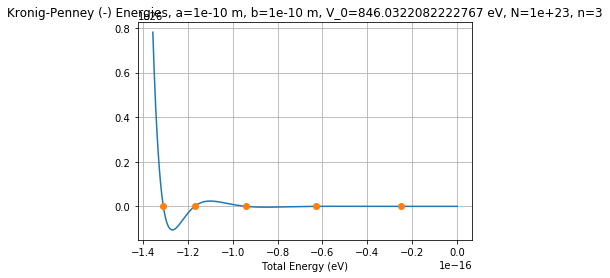

In [13]:
%matplotlib inline
e_neg = np.linspace(start=-0.9999999*depth_J, stop=-0.0000001*depth_J, num=1000)
eigenvalue_func_n = np.vectorize(eigenvalue_eq_n)
eig_char_eq_n = eigenvalue_func_n(e_neg) / J_eV_CONVERSION_JpeV
eig_n_fig = plt.plot(e_neg, eig_char_eq_n, label='Eq. 33')
plt.plot(eigenvals_n, eigenvalue_func_n(eigenvals_n) / J_eV_CONVERSION_JpeV, marker='o',
         linestyle='', label='(-) Eigenvalues')
plt.grid(True)
plt.title('Kronig-Penney (-) Energies, a={} m, b={} m, V_0={} eV, N={}, n={}'.format(
    len_a_m, len_b_m, depth_eV, num_periods, propagation_const))
plt.xlabel('Total Energy (eV)')
plt.show()